In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
train = pd.read_csv('DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)
test = pd.read_csv('DailyDelhiClimateTest.csv', index_col='date', parse_dates=True)

In [ ]:
train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [ ]:
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


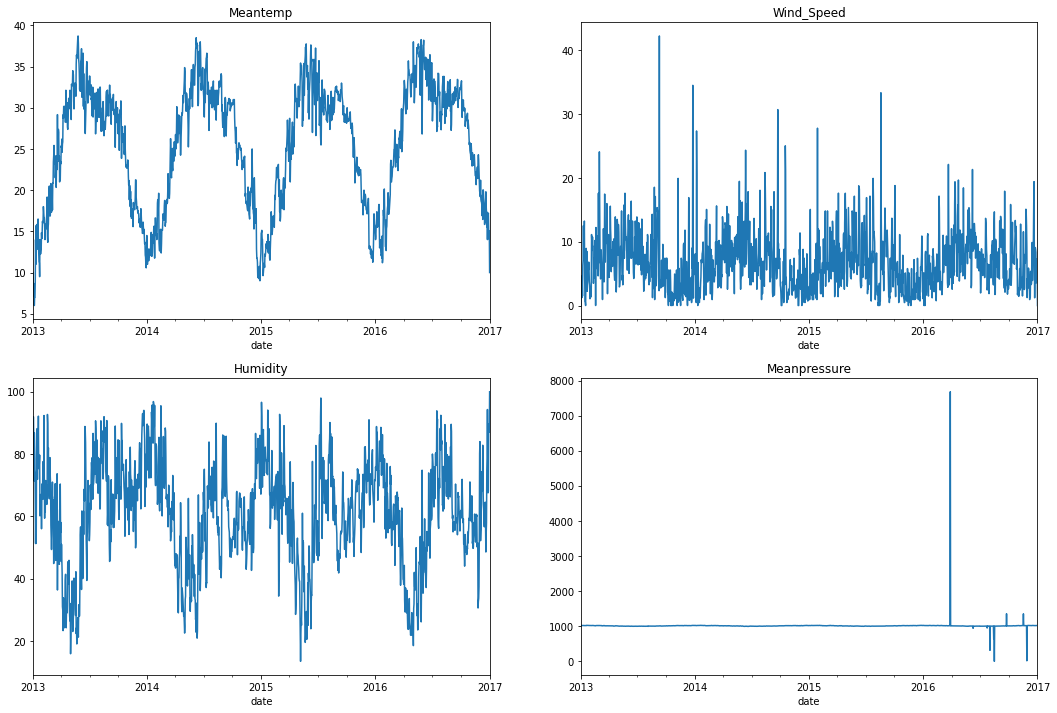

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
train['meantemp'].plot(ax = axes[0,0], title='Meantemp')
train['humidity'].plot(ax = axes[1,0], title='Humidity')
train['wind_speed'].plot(ax = axes[0,1], title='Wind_Speed')
train['meanpressure'].plot(ax = axes[1,1], title='Meanpressure')

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train.shape

(1462, 4)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [ ]:
generator[0]

(array([[[0.12227074, 0.8209571 , 0.        , 0.13260331],
         [0.04279476, 0.90759076, 0.07058266, 0.132881  ],
         [0.0356623 , 0.84983498, 0.10974262, 0.13299381],
         [0.08151383, 0.66886689, 0.02921206, 0.13279856],
         [0.        , 0.84790979, 0.08763619, 0.13271178],
         [0.03056769, 0.80132013, 0.03505448, 0.13290703],
         [0.03056769, 0.75280528, 0.14921838, 0.13316737],
         [0.08733624, 0.58085809, 0.16918184, 0.13300001],
         [0.24454148, 0.43688119, 0.29606821, 0.13277686],
         [0.15283843, 0.56105611, 0.17527238, 0.13260331],
         [0.29694323, 0.43729373, 0.25038912, 0.13266529],
         [0.24454148, 0.69966997, 0.31332476, 0.13259091]]]),
 array([[0.30058224, 0.71314631, 0.10974262, 0.13229958]]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
n_features = 4

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape =(length, n_features)))
model.add(Dense(4))
model.compile(optimizer='adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                11000     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 204       
Total params: 11,204
Trainable params: 11,204
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',patience=2)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [ ]:
model.fit(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
1450/1450 [==============================] - 9s 5ms/step - loss: 0.0195 - val_loss: 0.0052
Epoch 2/20
1450/1450 [==============================] - 7s 5ms/step - loss: 0.0064 - val_loss: 0.0044
Epoch 3/20
1450/1450 [==============================] - 7s 5ms/step - loss: 0.0063 - val_loss: 0.0046
Epoch 4/20
1450/1450 [==============================] - 7s 5ms/step - loss: 0.0054 - val_loss: 0.0043
Epoch 5/20
1450/1450 [==============================] - 7s 5ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 6/20
1450/1450 [==============================] - 7s 5ms/step - loss: 0.0057 - val_loss: 0.0046


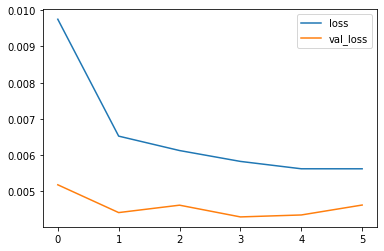

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [ ]:
first_batch = scaled_test[-12:]
first_batch.shape
first_batch = first_batch.reshape(1,12, 4)

In [ ]:
prediction = model.predict(first_batch)

In [ ]:
prediction

array([[0.8276943 , 0.20414276, 0.2286517 , 0.12952831]], dtype=float32)

In [ ]:
prediciton = scaler.inverse_transform(prediction)

In [ ]:
prediciton

array([[ 33.077427,  31.101501,   9.653675, 992.04346 ]], dtype=float32)

In [ ]:
curr_batch = scaled_train[-12:]
curr_batch = curr_batch.reshape(1,12,4)
predictions =[[]]
for i in range (len(test)) : 
  curr_pred = model.predict(curr_batch)
  predictions.append(scaler.inverse_transform(curr_pred))
  curr_batch=np.append(curr_batch,curr_pred)

  curr_batch = np.delete(curr_batch, 0)
  curr_batch = np.delete(curr_batch, 1)
  curr_batch = np.delete(curr_batch, 2)
  curr_batch = np.delete(curr_batch, 3)

  curr_batch = curr_batch.reshape(1,12,4)

In [ ]:
test['prediction'] = predictions

ValueError: ignored

In [ ]:
test